In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
energydata = pd.read_csv('../energy_import_export.csv')
solardata = pd.read_csv('../solar_self_consumption_main_building.csv')
weatherdata = pd.read_csv('../timeseries_met_data_202409050822.csv')

export_over0 = energydata[(energydata['Verdi'] > 0) & (energydata['Retning'] == 'EXPORT')]
export_not_solar = export_over0[(energydata['Måler-Id'] != 707057500042745649)]
fullsolar_building = energydata[(energydata['Måler-Id'] == 707057500042745649)]
print((export_not_solar.sort_values(by=['Verdi'])).tail(10))

       Energikilde Retning   Målernavn            Måler-Id  Verdi  \
1803  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.16   
3556  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.16   
6128  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.24   
3690  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.24   
3689  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.24   
3124  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.32   
2823  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.32   
5993  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.32   
5839  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.48   
2535  Elektrisitet  EXPORT  Hovedmåler  707057500085390523   0.80   

             Tidspunkt  
1803  2023-07-13 12:00  
3556  2023-07-25 16:00  
6128  2023-08-12 13:00  
3690  2023-07-26 15:00  
3689  2023-07-26 14:00  
3124  2023-07-22 16:00  
2823  2023-07-20 14:00  
5993  2023-08-11 14:00  
5839  2023-08-1

/var/folders/1f/v0gqjxts0235tbk5cdwc65fc0000gn/T/ipykernel_84087/2377985986.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  export_not_solar = export_over0[(energydata['Måler-Id'] != 707057500042745649)]


In [87]:
energyvalue = energydata.drop(columns=['Energikilde', 'Retning', 'Målernavn'])
energyvalue['time'] = pd.to_datetime(energyvalue['Tidspunkt'])
energyvalue['date'] = energyvalue['time'].dt.date  # Create a new 'date' column
month_energy = energyvalue
daily_data = energyvalue.groupby(['Måler-Id', 'date'], as_index=False)['Verdi'].mean()  # Take the mean per day

energyvalue.head(10)

,Måler-Id,Verdi,Tidspunkt,time,date
0,707057500038344962,19.80,2023-07-01 00:00,2023-07-01 00:00:00,2023-07-01
1,707057500042201572,35.10,2023-07-01 00:00,2023-07-01 00:00:00,2023-07-01
2,707057500042745649,0.00,2023-07-01 00:00,2023-07-01 00:00:00,2023-07-01
3,707057500085390523,27.44,2023-07-01 00:00,2023-07-01 00:00:00,2023-07-01
4,707057500042745649,27.50,2023-07-01 00:00,2023-07-01 00:00:00,2023-07-01
5,707057500085390523,0.00,2023-07-01 00:00,2023-07-01 00:00:00,2023-07-01
6,707057500085390523,21.52,2023-07-01 01:00,2023-07-01 01:00:00,2023-07-01
7,707057500085390523,0.00,2023-07-01 01:00,2023-07-01 01:00:00,2023-07-01
8,707057500042745649,27.10,2023-07-01 01:00,2023-07-01 01:00:00,2023-07-01
9,707057500038344962,19.00,2023-07-01 01:00,2023-07-01 01:00:00,2023-07-01


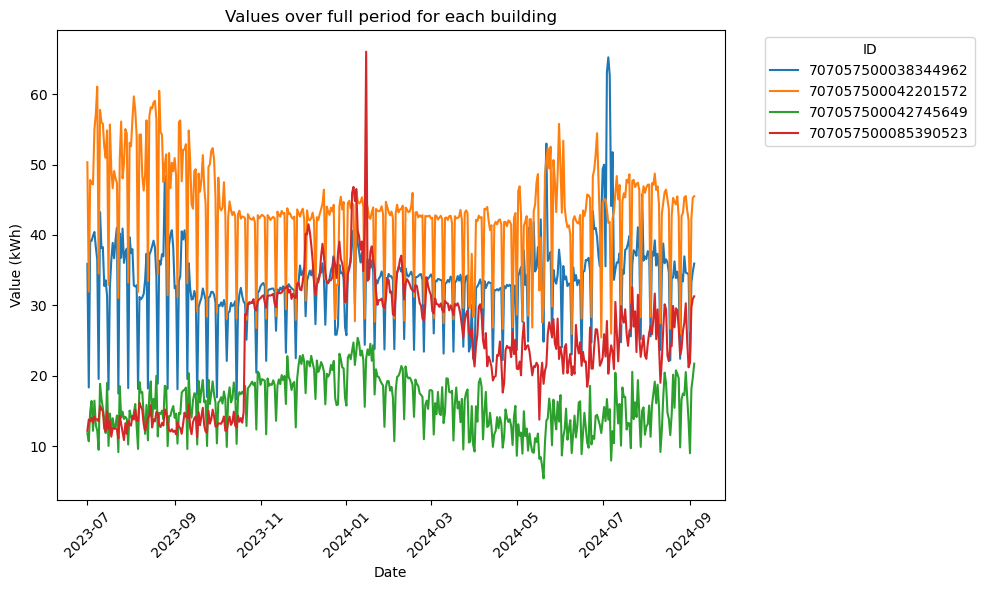

In [88]:
plt.figure(figsize=(10, 6))



for meter_id in energyvalue['Måler-Id'].unique():
    subset = daily_data[daily_data['Måler-Id'] == meter_id]
    plt.plot(subset['date'], subset['Verdi'], label=meter_id, linestyle='-', markersize=5, fillstyle='none')

plt.title('Values over full period for each building')
plt.xlabel('Date')
plt.ylabel('Value (kWh)')
plt.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [89]:
solar_building = fullsolar_building.drop(columns=['Energikilde', 'Målernavn', 'Måler-Id'])
#make export values negative
solar_building.loc[solar_building['Retning'] == 'EXPORT', 'Verdi'] *= -1

solar_building.head()

,Retning,Verdi,Tidspunkt
2,EXPORT,-0.0,2023-07-01 00:00
4,IMPORT,27.5,2023-07-01 00:00
8,IMPORT,27.1,2023-07-01 01:00
11,EXPORT,-0.0,2023-07-01 01:00
13,EXPORT,-0.0,2023-07-01 02:00


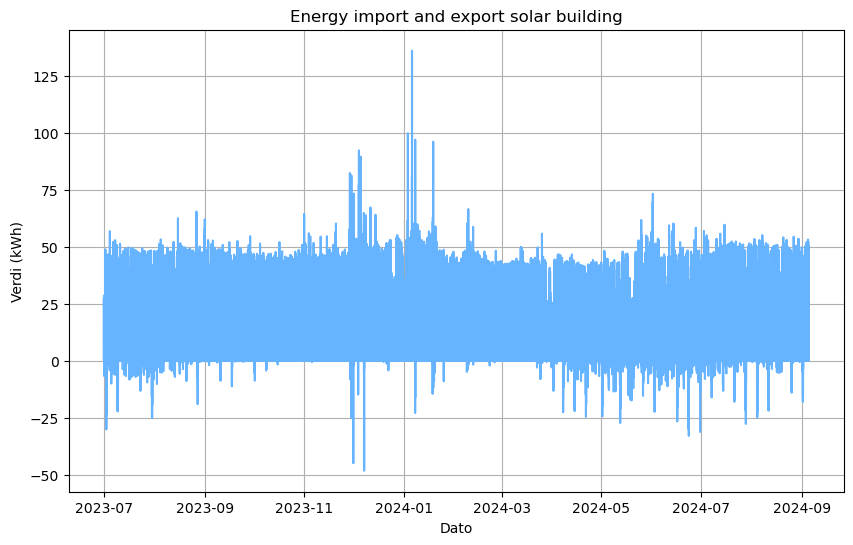

In [90]:
# Convert 'Tidspunkt' to datetime
# need less values pr day
solar_building['Tidspunkt'] = pd.to_datetime(solar_building['Tidspunkt'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(solar_building['Tidspunkt'], solar_building['Verdi'], color='#66b3ff')
plt.xlabel('Dato')
plt.ylabel('Verdi (kWh)')
plt.title('Energy import and export solar building')
plt.grid(True)

plt.show()

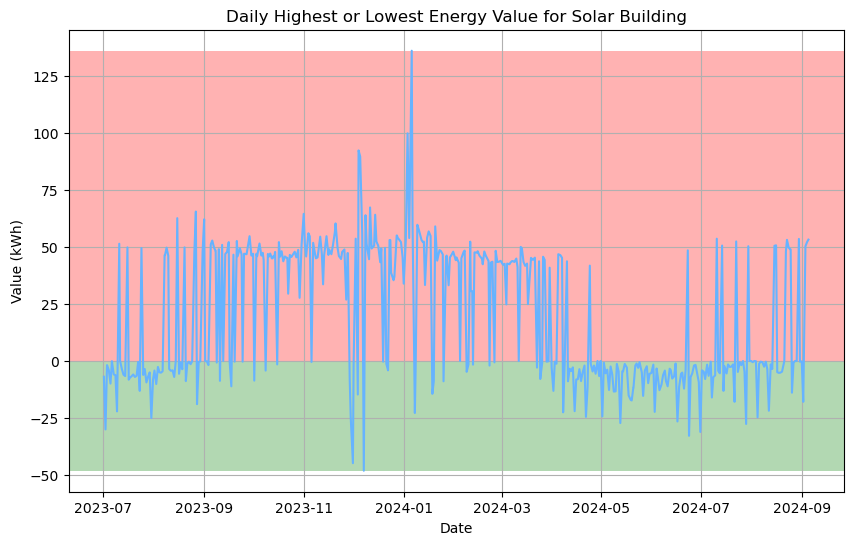

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'solar_building' dataframe has already been prepared
solar_building = fullsolar_building.drop(columns=['Energikilde', 'Målernavn', 'Måler-Id'])

# Make export values negative
solar_building.loc[solar_building['Retning'] == 'EXPORT', 'Verdi'] *= -1
solar_building['Tidspunkt'] = pd.to_datetime(solar_building['Tidspunkt'])

# Extract date only from timestamp for daily aggregation
solar_building['Date'] = solar_building['Tidspunkt'].dt.date

# Group by date and apply selection logic for each day
def daily_extreme(group):
    if group['Verdi'].min() < 0:
        return group[group['Verdi'] == group['Verdi'].min()]
    elif group['Verdi'].max() > 0:
        return group[group['Verdi'] == group['Verdi'].max()]
    else:
        return group.iloc[0:0]

daily_extremes = solar_building.groupby('Date').apply(daily_extreme).reset_index(drop=True)

plt.figure(figsize=(10, 6))

plt.axhspan(0, daily_extremes['Verdi'].max(), facecolor='red', alpha=0.3)
plt.axhspan(daily_extremes['Verdi'].min(), 0, facecolor='green', alpha=0.3)

plt.plot(daily_extremes['Tidspunkt'], daily_extremes['Verdi'], color='#66b3ff')

plt.xlabel('Date')
plt.ylabel('Value (kWh)')
plt.title('Daily Highest or Lowest Energy Value for Solar Building')
plt.grid(True)

plt.show()
